In [210]:
#import packages
%pylab inline
import pandas as pd
import seaborn as sns
import statsmodels.api as sm
import statsmodels.formula.api as smf
from sklearn import linear_model
from scipy import stats
import statsmodels.api as sm


Populating the interactive namespace from numpy and matplotlib


In [128]:
cd /Users/henrikeckermann/onedrive/programming/field

/Users/henrikeckermann/OneDrive/Programming/Field


In [213]:
# Linear regression with Field data
filename= "Album Sales 1.dat"
df=pd.read_csv(filename, delimiter="\t")
data= df.values

In [214]:
df.head()


,adverts,sales
0,10.256,330
1,985.685,120
2,1445.563,360
3,1188.193,270
4,574.513,220


In [277]:
X = df["adverts"]
y=df["sales"]
Rsq=np.corrcoef(X,y)[1,0]**2
s, i= np.polyfit(X,y,1)
lx=np.array([0,2500])
ly=[x*s+i for x in x]
d={"R²": [Rsq], "R": [np.corrcoef(X,y)[1,0]], "Slope": [s], "Intercept": [i], "SST": [0], "SSR":[0], "SSM":[0]}
df_r= pd.DataFrame(d)
df_r



In [285]:
#Using SKLEARN
feature_cols= ["adverts"]
X=df[feature_cols]
linreg=linear_model.LinearRegression()
linreg.fit(X,y)
print(linreg.intercept_)
print(linreg.coef_)

134.139937812
[ 0.09612449]


In [265]:
#Using STATSMODELS
#model=sm.OLS(y,X)
#results= model.fit()
#print(results.summary())
#model=linear_model.LinearRegression()
#results=model.fit(X,y)

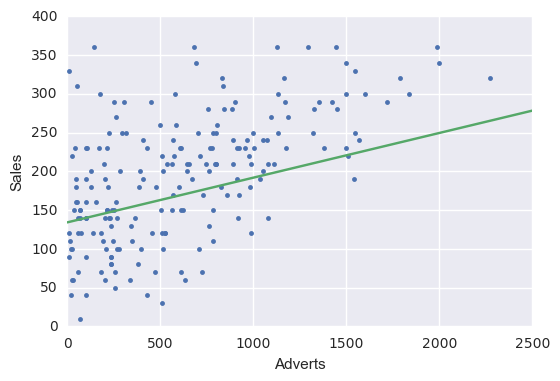

In [260]:
# Plot data
_=plt.plot(X,y, ".", linestyle= "none")
_=plt.plot(lx,ly)
_=plt.xlabel("Adverts")
_=plt.ylabel("Sales")
plt.show()

In [261]:
#Linear regression using SKLEARN
X = iris[["petal_length"]]
y = iris["petal_width"]

# Fit the linear model
model = linear_model.LinearRegression()
results = model.fit(X, y)
rsq=model.score(X,y)
# Summarize stats in df_r
d={"R²": [model.score(X,y)],"Slope":list(results.coef_),"Intercept":[results.intercept_], "R":[np.sqrt(model.score(X,y))], "SSM":[0], "SST":[0], "SSR":[0],"F": [0]}
df_r=pd.DataFrame(d)
df_r

,F,Intercept,R,R²,SSM,SSR,SST,Slope
0,0,-0.363076,0.962865,0.92711,0,0,0,0.415755


In [257]:
# Linear Regression unsing STATSMODELS
import statsmodels.api as sm

In [209]:
model = sm.OLS(y,X)
results= model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:            petal_width   R-squared:                       0.967
Model:                            OLS   Adj. R-squared:                  0.967
Method:                 Least Squares   F-statistic:                     4417.
Date:                Sat, 14 Jan 2017   Prob (F-statistic):          1.22e-112
Time:                        20:52:26   Log-Likelihood:                -8.7179
No. Observations:                 150   AIC:                             19.44
Df Residuals:                     149   BIC:                             22.45
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [95.0% Conf. Int.]
--------------------------------------------------------------------------------
petal_length     0.3365      0.005     66.463   